# **BERTimbau For Measuring Text Similarity**

# **High-performance semantic similarity with BERTimbau**

# **Sem Arquitetura Transformers**

In [76]:
#!pip install sentence_transformers

In [77]:
sentences = [
    "Uma mulher está dançando e cantando na chuva",
    "Uma mulher está dançando e cantando sozinha"
]

In [78]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('neuralmind/bert-base-portuguese-cased')

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/neuralmind_bert-base-portuguese-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [79]:
sentence_embeddings = model.encode(sentences)

In [80]:
sentence_embeddings.shape

(2, 768)

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

In [82]:
cosine_similarity(
    [sentence_embeddings[0]],
    sentence_embeddings[1:]
)

array([[0.9390813]], dtype=float32)

# **Com Arquitetura Transformers**

In [83]:
from transformers import AutoTokenizer, AutoModel
import torch

In [84]:
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
model = AutoModel.from_pretrained('neuralmind/bert-base-portuguese-cased')

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [85]:
sentences = [
    "Uma mulher está dançando e cantando na chuva",
    "Uma mulher está dançando e cantando sozinha"
]

# initialize dictionary to store tokenized sentences
tokens = {'input_ids': [], 'attention_mask': []}

for sentence in sentences:
    # encode each sentence and append to dictionary
    new_tokens = tokenizer.encode_plus(sentence, max_length=128,
                                       truncation=True, padding='max_length',
                                       return_tensors='pt')
    tokens['input_ids'].append(new_tokens['input_ids'][0])
    tokens['attention_mask'].append(new_tokens['attention_mask'][0])

# reformat list of tensors into single tensor
tokens['input_ids'] = torch.stack(tokens['input_ids'])
tokens['attention_mask'] = torch.stack(tokens['attention_mask'])

In [86]:
outputs = model(**tokens)
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [87]:
embeddings = outputs.last_hidden_state
embeddings

tensor([[[ 0.2265,  0.2169,  0.6226,  ..., -0.3861,  0.0679, -0.7341],
         [ 0.1134, -0.3357,  0.9873,  ...,  0.0794,  0.1296, -0.4402],
         [-0.0878, -0.2079,  0.9732,  ...,  0.6130, -0.4295, -0.6691],
         ...,
         [ 0.1173,  0.3805,  0.1654,  ..., -0.2994, -0.1794, -0.7700],
         [ 0.3061,  0.0594, -0.0379,  ..., -0.3596, -0.0094, -0.4839],
         [ 0.4669,  0.0380,  0.6264,  ...,  0.2059, -0.1911, -1.1704]],

        [[ 0.1771,  0.1583,  0.6411,  ..., -0.3339,  0.2788, -0.6290],
         [ 0.0866, -0.3516,  1.0528,  ...,  0.0604,  0.0680, -0.5075],
         [-0.1546, -0.2311,  1.0607,  ...,  0.5750, -0.4634, -0.6676],
         ...,
         [ 0.3034,  0.3928,  0.1917,  ..., -0.1304, -0.0405, -0.6491],
         [ 0.5660,  0.2143,  0.4229,  ..., -0.1593,  0.0407, -0.5171],
         [ 0.5907,  0.2326,  0.3162,  ..., -0.1305,  0.0715, -0.6093]]],
       grad_fn=<NativeLayerNormBackward0>)

In [88]:
embeddings.shape

torch.Size([2, 128, 768])

In [89]:
attention_mask = tokens['attention_mask']
attention_mask.shape

torch.Size([2, 128])

In [90]:
mask = attention_mask.unsqueeze(-1).expand(embeddings.size()).float()
mask.shape

torch.Size([2, 128, 768])

In [91]:
mask

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [92]:
masked_embeddings = embeddings * mask
masked_embeddings.shape

torch.Size([2, 128, 768])

In [93]:
masked_embeddings

tensor([[[ 0.2265,  0.2169,  0.6226,  ..., -0.3861,  0.0679, -0.7341],
         [ 0.1134, -0.3357,  0.9873,  ...,  0.0794,  0.1296, -0.4402],
         [-0.0878, -0.2079,  0.9732,  ...,  0.6130, -0.4295, -0.6691],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ..., -0.0000, -0.0000, -0.0000],
         [ 0.0000,  0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, -0.0000, -0.0000]],

        [[ 0.1771,  0.1583,  0.6411,  ..., -0.3339,  0.2788, -0.6290],
         [ 0.0866, -0.3516,  1.0528,  ...,  0.0604,  0.0680, -0.5075],
         [-0.1546, -0.2311,  1.0607,  ...,  0.5750, -0.4634, -0.6676],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ..., -0.0000, -0.0000, -0.0000],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.0000,  0.0000, -0.0000],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.0000,  0.0000, -0.0000]]],
       grad_fn=<MulBackward0>)

In [94]:
summed = torch.sum(masked_embeddings, 1)
summed.shape

torch.Size([2, 768])

In [95]:
summed_mask = torch.clamp(mask.sum(1), min=1e-9)
summed_mask.shape

torch.Size([2, 768])

In [96]:
summed_mask

tensor([[11., 11., 11.,  ..., 11., 11., 11.],
        [10., 10., 10.,  ..., 10., 10., 10.]])

In [97]:
mean_pooled = summed / summed_mask

In [98]:
mean_pooled

tensor([[ 0.1304,  0.0439,  0.4949,  ...,  0.0761, -0.1849, -0.5774],
        [ 0.1204,  0.0425,  0.5188,  ..., -0.0499, -0.1320, -0.6499]],
       grad_fn=<DivBackward0>)

In [99]:
from sklearn.metrics.pairwise import cosine_similarity

In [100]:
# convert from PyTorch tensor to numpy array
mean_pooled = mean_pooled.detach().numpy()

# calculate
cosine_similarity(
    [mean_pooled[0]],
    mean_pooled[1:]
)

array([[0.9390812]], dtype=float32)

# **Semantic Textual Similarity**

In [101]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('neuralmind/bert-base-portuguese-cased')

# Two lists of sentences
sentences1 = ["Uma mulher está dançando e cantando na chuva",
              "Uma pessoa perto de uma cebola tem um corte",
              "A pessoa está pintando"]

sentences2 = ["Uma mulher está dançando e cantando sozinha",
              "Uma pessoa está cortando uma cebola",
              "Um homem está desenhando uma imagem"]

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarits
cosine_scores = util.cos_sim(embeddings1, embeddings2)

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/neuralmind_bert-base-portuguese-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [102]:
#Output the pairs with their score
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))

Uma mulher está dançando e cantando na chuva 		 Uma mulher está dançando e cantando sozinha 		 Score: 0.9391
Uma pessoa perto de uma cebola tem um corte 		 Uma pessoa está cortando uma cebola 		 Score: 0.8764
A pessoa está pintando 		 Um homem está desenhando uma imagem 		 Score: 0.8066


# **Semantic Textual Similarity - Palavra por Palavra**

In [177]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('neuralmind/bert-base-portuguese-cased')

# Two lists of sentences
sentences1 = ["Uma",
              "mulher",
              "está",
              "dançando",
              "e",
              "cantando",
              "na",
              "chuva"]

sentences2 = ["Uma",
              "mulher",
              "está",
              "dançando",
              "e",
              "cantando",
              "na",
              "cozinha"]

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarits
cosine_scores = util.cos_sim(embeddings1, embeddings2)

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/neuralmind_bert-base-portuguese-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [178]:
#Output the pairs with their score
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))

Uma 		 Uma 		 Score: 1.0000
mulher 		 mulher 		 Score: 1.0000
está 		 está 		 Score: 1.0000
dançando 		 dançando 		 Score: 1.0000
e 		 e 		 Score: 1.0000
cantando 		 cantando 		 Score: 1.0000
na 		 na 		 Score: 1.0000
chuva 		 cozinha 		 Score: 0.5941


# **Analyzing Word Embeddings**
## **Utilizando BertEmbedding(model='bert_12_768_12', dataset_name='wiki_multilingual')**

In [1]:
#!pip install transformers
#!pip install simpletransformers
#!pip install sentence_transformers
#!pip install bert-tensorflow
#!pip install nltk
#!pip install bert_embedding
#!pip3 install numpy --upgrade

In [2]:
from nltk.tokenize import word_tokenize
from transformers import AutoTokenizer, AutoModel 
from transformers import AutoModelForPreTraining  
from transformers import AutoModel
from simpletransformers.language_representation import RepresentationModel
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import torch
import nltk
nltk.download('punkt')
from sentence_transformers import SentenceTransformer, util

from bert_embedding import BertEmbedding

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
bert_embedding = BertEmbedding(model='bert_12_768_12', dataset_name='wiki_multilingual_uncased')

Vocab file is not found. Downloading.


In [4]:
class Embeddings:
  
  def __init__(self, sentence_1, sentence_2):
    self.sentence_1 = sentence_1
    self.sentence_2 = sentence_2
    self.tokenized_sent_1 = word_tokenize(self.sentence_1)
    self.tokenized_sent_2 = word_tokenize(self.sentence_2)
  
  def get_bertimbau_embedding(self):
    '''Creates word embeddings taken from BERT language representation
      returns: list, list
      Returns the BERT embeddings of the tokens of two sentences'''
    
    bertimbau_embedding_1  = BertEmbedding().embedding(sentences = self.tokenized_sent_1)
    bertimbau_embedding_2  = BertEmbedding().embedding(sentences = self.tokenized_sent_2)
    
    return bertimbau_embedding_1, bertimbau_embedding_2

In [5]:
class Embedding2Array:  
  
  def bertimbau(self,embedding): #Ricardo, atento a isto aqui
    ''' Creates the list of arrays of each corresponding word
    param
    embedding: list
    returns: list
      Returns the list of BERT embedding of each word 
    '''
    word_array = []
    for i in range(len(embedding)):
      word_array.append(embedding[i][1][0])
    
    return word_array



In [6]:
class SimilarityFunctions:

  def __init__(self, sentence_1, sentence_2, word_array_1, word_array_2):
    self.sentence_1 = sentence_1
    self.sentence_2 = sentence_2
    self.word_array_1 = word_array_1
    self.word_array_2 = word_array_2
  
  def cosine_similarity_matrix(self):
    '''
    Creates a matrix depicting the cosine distances between the words of two sentences
    returns: array
      Similarity matrix of words in two sentences
    '''
    matrix = np.zeros((len(self.word_array_1), len(self.word_array_2)))

    for i in range(0, len(self.word_array_1)):
      for j in range(0, len(self.word_array_2)):
        matrix[i][j]= scipy.spatial.distance.cosine(self.word_array_1[i], self.word_array_2[j])
    return matrix.T
  
  def plot_similarity_matrix(self, title):
    '''Plot the similarity matrix of two sentences
    param:
    title: str
      Labels the plot with the corresponding title
    returns: None
    '''
    x_labels, y_labels = word_tokenize(self.sentence_1), word_tokenize(self.sentence_2)
    similarity_matrix = self.cosine_similarity_matrix()
    sns.heatmap(similarity_matrix, vmin=0, vmax=1, xticklabels=x_labels, yticklabels=y_labels, cmap="YlGnBu", annot = True)
    plt.title(title)
    plt.show()    
  
  def get_similar_words(self):
    '''Prints similar word from second sentence for each word in the first sentence
    returns: list of similar words
    '''

    token_1 = word_tokenize(self.sentence_1)
    token_2 = word_tokenize(self.sentence_2)
    
    similarity_matrix = self.cosine_similarity_matrix()
    
    similar_word_dict = {}
    for row in range(0,len(similarity_matrix[0])):
      
      min_val = min(similarity_matrix.T[row]) #Here min value of transpose is found. To understand it print similarity matrix and find the logic
      index = (np.where(similarity_matrix.T[row] == min_val))[0]
      similar_word_list = []
      
      for i in range(0,len(index)):
        similar_word_list.append(token_2[index[i]])
        similar_word_dict[token_1[row]] = similar_word_list
      
    print('Similar words in two sentences are :', similar_word_dict)

In [7]:
class Main:
  def __init__(self, sentence_1, sentence_2):
    self.first_sentence = sentence_1
    self.second_sentence = sentence_2

  def bertimbau(self):
    '''Creates a list of BERT word embeddings of each sentence
    returns: list, list
      The list of embeddings of words of each sentence
    '''
    embed = Embeddings(self.first_sentence, self.second_sentence)
    embed2array = Embedding2Array()
    first_embedding, second_embedding = embed.get_bertimbau_embedding()
    first_array, second_array = embed2array.bertimbau(first_embedding), embed2array.bertimbau(second_embedding)
    return first_array, second_array

In [8]:
class AnalyzeWordEmbeddings:
  
  def __init__(self,sentence_1, sentence_2):
    self.sentence_1 = sentence_1
    self.sentence_2 = sentence_2
  
  def bertimbau(self):
    '''Plots similarity matrix using GPT embeddings and returns similar words in both the sentences
    returns: dict
      A dictionary matching the similar words from one sentence to other using GPT embeddings
    '''    
    main = Main(self.sentence_1, self.sentence_2)
    array_1, array_2 = main.bertimbau()
    similarityfunc = SimilarityFunctions(self.sentence_1, self.sentence_2, array_1, array_2)
    similarity_matrix = similarityfunc.cosine_similarity_matrix()
    similarityfunc.plot_similarity_matrix('Similarity plot using BERT embeddings')
    similarityfunc.get_similar_words()

In [9]:
first_sentence_1 = "Uma mulher está dançando e cantando na chuva"
second_sentence_1 = "Uma mulher está dançando e cantando sozinha" 

Vocab file is not found. Downloading.


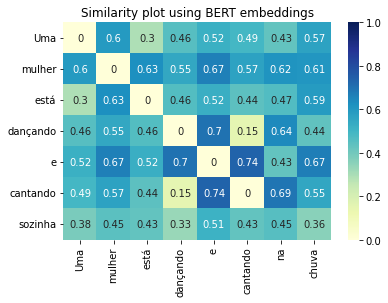

Similar words in two sentences are : {'Uma': ['Uma'], 'mulher': ['mulher'], 'está': ['está'], 'dançando': ['dançando'], 'e': ['e'], 'cantando': ['cantando'], 'na': ['Uma'], 'chuva': ['sozinha']}


In [10]:
analyze_word_embed_1 = AnalyzeWordEmbeddings(first_sentence_1, second_sentence_1)
analyze_word_embed_1.bertimbau()